<a href="https://colab.research.google.com/github/virb30/health-insurance-prediction/blob/main/PROJETO_Prevendo_custo_de_Seguro_de_Vida_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**


---

# Prevendo o custo do Seguro de vida

O papel do seguro é uma ferramenta para gerenciar o risco financeiro, é evidente que possuir um seguro de saúdo melhora a segurança financeira conforme descrito neste [artigo](http://medicine.tums.ac.ir/filegallery/2299016929/nezamoleslami%2031%20ordibehesht.pdf) do *The new england journal of medicine*.

<center>
  <img src="https://raw.githubusercontent.com/virb30/health-insurance-prediction/main/health-insurance-cover.jpg" width="400px" />
</center>

Ainda segundo os autores desse artigo, a expansão da cobertura por seguro aumentou, significativamente o acesso de pacientes a serivços de saúde, uso de saúde preventiva, tratamento de doenças crônicas, medicamentos e cirurgias, promovendo, portanto benefícios à saúde como detecção precoce de doenças, melhor aderência à medicamentos e gestão de condições crônicas.

Mas todos esses benefícios têm um custo: mais despesas para os órgãos estaduais, federais, locais ou privados.

Diante disso empresas que comercializam seguro de vida, com o objetivo de reduzir os potenciais prejuízos e ainda assim serem competitvas no mercado,  costumam determinar o preço dos seus serviços através da avaliação de risco do cliente.

## Objetivo Geral

O objetivo desse projeto é construir um modelo de Machine Learning de regressão para prever custos de seguro de vida utilizando AutoML.

### Objetivos específicos

Para atingirmos o objetivo geral proposto iremos realizar as seguintes etapas de modo a conhecer nossos dados e escolher o melhor modelo para o problema proposto:

1. Aquisição dos dados
2. Análise exploratória
3. Tratamento dos dados
4. Escolha do modelo
5. Treinamento do modelo
6. Avaliação do modelo
7. Teste do modelo

## Aquisição dos Dados

Os dados foram obtidos do [Kaggle](https://www.kaggle.com/annetxu/health-insurance-cost-prediction), e também estão disponíveis nesse [link](https://raw.githubusercontent.com/virb30/health-insurance-prediction/main/insurance.csv).

In [1]:
# instalando a biblioteca pycaret
!pip install pycaret -q

In [2]:
# habilitando pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
# importar pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise exploratória

Antes de iniciar a construção do modelo, precisamos conhecer o *dataset* que estamos trabalhando.

Vamos iniciar essa etapa com a importação dos dados e quais as dimensões (quantos registros e variáveis) do *dataset* que estamos lidando.

In [4]:
# carregar os dados
df = pd.read_csv('https://raw.githubusercontent.com/virb30/health-insurance-prediction/main/insurance.csv')

# ver dimensões do dataset
df.shape

(1338, 7)

Nosso dataset contém 1338 registros e 7 variáveis,

Vamos verificar os primeiros registros de modo a conhecermos quais são e o que representam nossas variáveis.

In [5]:
# visualizar as 5 primeiras entradas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Dicionário de variáveis

Visualizando as 5 primeiras entradas conseguimos extrair as variáveis e seu significado:

* `age` - Idade
* `sex` - Sexo
* `bmi` - *Body Mass Index* (índice de massa corporal)
* `children` - Quantidade de filhos
* `smoker` - Fumante
* `region` - Região
* `charges` - Custos variável alvo.

Agora que conhecemos nossas variáveis vamos verificar quais são seus tipos:



In [6]:
# ver tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Podemos ver a seguir que as variáveis categóricas `sex`, `smoker` e `region` possuem respectivamente 2, 2 e 4 valores únicos.

In [7]:
# verificar quantidade de valores únicos por variável
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df.isnull().sum() / df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Visualizando as informações do dataframe percebemos que não temos valores nulos, nos poupando dessa etapa do tratamento. 

## Tratamento dos dados

Antes de avançarmos para o treinamento do modelo, precisaremos realizar alguns tratamentos nos dados. Pela nossa análise exploratória podemos perceber que variáveis `region`, `sex` e `smoker` são texto, portanto precisaremos converte-las antes de treinar nosso modelo.

Iremos converter a variável `smoker` para 0 e 1 de modo que `no` = 0 e `yes` = 1
Também iremos converter as variáveis `region` e `sex` utilizando a técnica de * OneHotEncoding*.

Como são transformações relativamente simples, optamos por realizar a transformação no conjunto antes da separação nos conjuntos de treino e teste.

Vamos começar substituindo os valores da variável `smoker` conforme descrito.

Iremos começar separando nosso conjunto de dados em treino e teste.

In [39]:
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

print(f'Dimensões treino: {train.shape}')
print(f'Dimensões teste: {test.shape}')

Dimensões treino: (1204, 7)
Dimensões teste: (134, 7)


Iremos criar funções para aplicar sempre as mesmas transformações tanto nos conjuntos de treino e teste:

In [10]:
def encode_smoker(data):
  if data == 'yes':
    return 1
  else:
    return 0

In [11]:
# tratar variáveis dos dados de treino
train.smoker = train.smoker.apply(encode_smoker)
# visualizar registros
train.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.9240
1,18,male,33.77,1,0,southeast,1725.5523
2,28,male,33.00,3,0,southeast,4449.4620
3,31,female,25.74,0,0,southeast,3756.6216
4,46,female,33.44,1,0,southeast,8240.5896


## Escolhendo o modelo

Para nos auxiliar na escolha do melhor modelo utilizaremos o `pycaret`. Utilizaremos como métrica o R2.

Primeiro importamos as funções do pacote `pycaret.regression`.

In [12]:
# import pycaret
from pycaret.regression import *

Em seguida vamos inicializar o pipeline do PyCaret utilizando a função `setup`.

O PyCaret aplica o OneHotEncoder automaticamente em todos os valores considerados categóricos, portanto não precisamos transformar os dados manualmente. 
Também passaremos o parâmetro `normalize = True` para que o PyCaret faça a padronização dos dados automaticamente.

In [13]:
reg = setup(data = train,
            target = 'charges',
            normalize = True,
            log_experiment = False)

,Description,Value
0,session_id,8484
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


Em seguida vamos verificar qual é o melhor modelo de regressão para nosso modelo:

In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2507.2958,2.116437e+07,4558.7550,0.8394,0.4310,0.2983,0.083
lightgbm,Light Gradient Boosting Machine,2837.9730,2.381495e+07,4841.2470,0.8220,0.5332,0.3586,0.085
rf,Random Forest Regressor,2717.0099,2.382494e+07,4845.8855,0.8211,0.4766,0.3383,0.549
et,Extra Trees Regressor,2794.0175,2.793393e+07,5244.5230,0.7899,0.5108,0.3536,0.509
ada,AdaBoost Regressor,4507.0789,3.036138e+07,5466.9100,0.7752,0.6603,0.8015,0.041
ridge,Ridge Regression,4338.2279,3.849029e+07,6180.3912,0.7165,0.5822,0.4431,0.017
br,Bayesian Ridge,4335.7795,3.849378e+07,6180.5536,0.7164,0.5871,0.4425,0.014
llar,Lasso Least Angle Regression,4319.7905,3.847167e+07,6178.7269,0.7163,0.5719,0.4401,0.016
lr,Linear Regression,4327.3543,3.849228e+07,6180.1073,0.7161,0.5920,0.4406,0.293
lasso,Lasso Regression,4327.3401,3.849366e+07,6180.2573,0.7161,0.5995,0.4407,0.015


Vemos acima que o melhor modelo para nosso cenário (que possui maior R2) é o GBR (Gradient Boost Regressor), para nossa análise vamos escolher os 3 primeiros modelos e ver qual deles desempenha melhor após o tuning.



Vamos ver quais os parâmetros ótimos para ele:


In [15]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=8484, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Gradient Boosting Regressor

Gradient Boosting é uma das técnicas mais poderosas para criar modelos preditivos. E envolve 3 elementos:

1. Uma *loss function* para ser otimizada
2. Um *weak learner* para fazer previsões
3. Um modelo aditivo para adicionar aos *weak learner* e minimzar a *loss function*

Em resumo o *Gradient Boosting* aprende com os erros e melhora a cada interação.

Na sequência iremos criar esse modelo para realizarmos as previsões.

In [16]:
# criar modelo GBR
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2324.2820,1.679438e+07,4098.0945,0.9138,0.4312,0.3127
1,2753.5757,2.454744e+07,4954.5374,0.8712,0.4779,0.3237
2,2893.9619,3.197487e+07,5654.6323,0.7284,0.5240,0.3178
3,2223.6427,1.360807e+07,3688.9122,0.9134,0.3490,0.2502
4,2409.0241,1.833863e+07,4282.3622,0.8771,0.3917,0.2916
5,2528.7173,1.984265e+07,4454.5090,0.8719,0.4128,0.2974
6,2047.0872,1.609890e+07,4012.3434,0.8649,0.3257,0.2254
7,2429.2304,2.006337e+07,4479.2149,0.8963,0.4078,0.2781
8,2910.0054,3.126954e+07,5591.9178,0.6124,0.5500,0.3510
9,2553.4316,1.910587e+07,4371.0262,0.8446,0.4401,0.3355


*Random Forest Regressor*:

In [17]:
# criar modelo RF
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2391.2224,1.913274e+07,4374.0989,0.9018,0.4924,0.3403
1,2699.9203,2.533912e+07,5033.7978,0.8670,0.4966,0.3014
2,3258.6071,3.546314e+07,5955.0936,0.6988,0.6073,0.4184
3,2781.6637,1.860125e+07,4312.9161,0.8816,0.3952,0.3213
4,2505.9120,1.906464e+07,4366.3074,0.8722,0.3609,0.2742
5,2890.5421,2.524851e+07,5024.7899,0.8370,0.4986,0.3704
6,2181.2811,1.716428e+07,4142.9802,0.8560,0.3613,0.2526
7,2763.6696,2.475396e+07,4975.3353,0.8720,0.4819,0.3198
8,3111.3879,3.285745e+07,5732.1422,0.5927,0.5813,0.4212
9,2585.8927,2.062426e+07,4541.3941,0.8323,0.4911,0.3633


*Light GBM*:

In [18]:
# criar modelo lightgbm
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2594.5751,2.151495e+07,4638.4214,0.8895,0.6100,0.3614
1,2880.7225,2.650962e+07,5148.7491,0.8609,0.5120,0.3244
2,3569.0752,3.616493e+07,6013.7282,0.6928,0.6313,0.4612
3,2469.5049,1.531316e+07,3913.2034,0.9025,0.3652,0.2730
4,2592.1794,1.893203e+07,4351.0957,0.8731,0.4562,0.3252
5,2817.3829,2.118701e+07,4602.9345,0.8632,0.4754,0.3462
6,2461.2349,1.808801e+07,4252.9996,0.8482,0.3590,0.2776
7,2950.0809,2.662600e+07,5160.0385,0.8623,0.6540,0.3450
8,3153.2668,3.178542e+07,5637.8560,0.6060,0.6228,0.4659
9,2891.7076,2.202841e+07,4693.4431,0.8209,0.6465,0.4058


### Tunando o modelo

Quando um modelo é criado usando o create_model() ele usa os hiperparâmetros padrão para cada modelo. Para fazer o tuning desses parâmetros, usamos a função tune_model().

Essa função faz o tuning dos parâmetros automaticamente, e mais uma vez o avalia com validação cruzada.

Por padrão o `tune_model()` utiliza o Random Grid Search para encontrar os parâmetros otimizados. 

In [19]:
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2292.3875,1.834504e+07,4283.1111,0.9058,0.4848,0.2915
1,2790.0548,2.623138e+07,5121.6583,0.8624,0.5238,0.3250
2,3073.7080,3.237767e+07,5690.1383,0.7250,0.5362,0.3400
3,2421.3755,1.474136e+07,3839.4473,0.9061,0.3540,0.2618
4,2556.2299,2.015264e+07,4489.1696,0.8649,0.4055,0.2972
5,2525.6882,2.015456e+07,4489.3828,0.8699,0.4473,0.3280
6,2195.4366,1.765036e+07,4201.2329,0.8519,0.3085,0.2303
7,2659.1984,2.199158e+07,4689.5184,0.8863,0.4234,0.2809
8,3088.0177,3.228391e+07,5681.8932,0.5998,0.6101,0.4005
9,2574.0826,2.093280e+07,4575.2374,0.8298,0.4749,0.3578


In [20]:
tuned_rf = tune_model(rf, optimize='R2')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2429.0157,1.863237e+07,4316.5227,0.9043,0.4704,0.3261
1,2619.0243,2.274614e+07,4769.2918,0.8806,0.4519,0.2667
2,3158.6075,3.307803e+07,5751.3501,0.7191,0.5695,0.3913
3,2361.9722,1.358252e+07,3685.4467,0.9135,0.3491,0.2607
4,2458.7272,1.815530e+07,4260.9041,0.8783,0.3947,0.3011
5,2558.2862,1.951726e+07,4417.8346,0.8740,0.4414,0.3115
6,2117.0036,1.544309e+07,3929.7697,0.8704,0.3153,0.2264
7,2558.1616,2.197926e+07,4688.2048,0.8864,0.4529,0.2993
8,2887.0535,2.880107e+07,5366.6624,0.6430,0.5515,0.4076
9,2517.3667,1.875473e+07,4330.6730,0.8475,0.4492,0.3280


In [21]:
tuned_lightgbm = tune_model(lightgbm, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2506.8866,2.088919e+07,4570.4697,0.8927,0.5179,0.3325
1,2844.9780,2.649710e+07,5147.5335,0.8610,0.5165,0.3265
2,3431.6134,3.608706e+07,6007.2507,0.6935,0.6532,0.4204
3,2434.9477,1.438834e+07,3793.1961,0.9084,0.3573,0.2886
4,2591.3433,1.893498e+07,4351.4343,0.8731,0.4914,0.3315
5,2773.2338,2.242275e+07,4735.2669,0.8552,0.5067,0.3275
6,2345.1589,1.612960e+07,4016.1675,0.8647,0.3384,0.2608
7,3009.2937,2.503581e+07,5003.5793,0.8706,0.8133,0.3673
8,3055.3665,3.078529e+07,5548.4489,0.6184,0.6018,0.4437
9,2779.7652,2.151993e+07,4638.9577,0.8250,0.6926,0.3803


O tuning do modelo nos revela algumas características interessantes:
* o GBR com parâmetros default apresentou desempenho ligeiramente melhor do que sua versão tunada.
* o Random Forest tunado apresentou melhor desempenho superando até a versão *default* GBR
* o Light GBM tunado apresentou melhor desempenho que sua versão com parâmetros *default*. Mas ainda assim se mostrou inferior ao Random Forest.

No entanto vale ressaltar que o tempo de execução do Random Forest, para nosso conjunto de dados foi muito superior aos demais, esse pode ser um fator relevante no momento da escolha do modelo.

### Plot dos modelos

Em seguida vamos plotar o erro de cada um dos modelos tunados e comparar qual obteve o melhor desempenho. Começando com o Gradient Boosting Regressor:

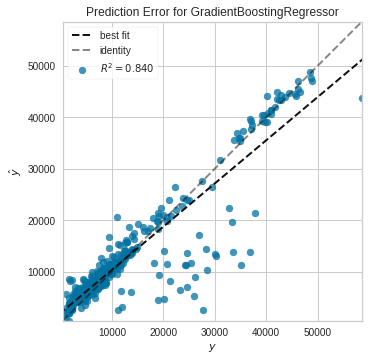

In [27]:
# GBR
plot_model(tuned_gbr, plot='error')

Seguindo com o *Random forest*

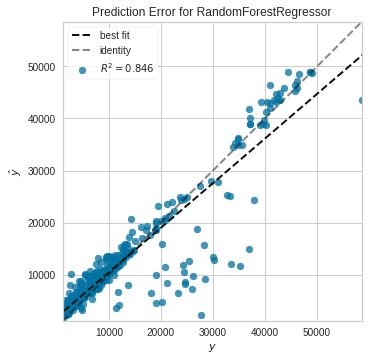

In [28]:
# RF
plot_model(tuned_rf, plot='error')

E por fim o Light GBM:

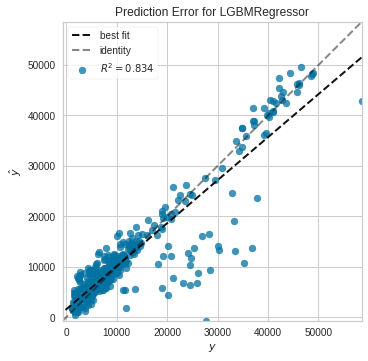

In [29]:
# Light GBM
plot_model(tuned_lightgbm, plot='error')

Antes de finalizar os modelos, vamos realizar algumas previsões e verificar como eles se saem com os dados "desconhecidos". Iremos repetir os mesmos passos com os três modelos. Começando com o GBR.

In [30]:
#realizando previsões GBR
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2603.4247,2.334933e+07,4832.1144,0.84,0.4524,0.333


Para as previsões utilizando o GBR obtivemos um R2 de 0.84 bem próximo do R2 de 0.83 que obtivemos na média da validação cruzada. Isso nos mostra que o modelo não está com *over-fitting*

Faremos o mesmo com o modelo de Random Forest:

In [31]:
# realizando previsões RF
predict_model(tuned_rf);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,2553.5785,2.251619e+07,4745.1224,0.8457,0.4312,0.3164


Para as previsões utilizando o Random Forest obtivemos resultados semelhantes ao do GBR inclusive.

Por fim vamos verificar como se sai o modelo Light GBM:

In [32]:
# realizando previsões Light GBM
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2711.0049,2.423620e+07,4923.028,0.8339,0.4922,0.3422


Apesar de apresentar um desempenho ligeiramente inferior aos anteriores o desempenho do Light GBM foi similiar, respeitando a média obtida na validação cruzada.

Diante dos resultados e levando em consideração nossa análise, apesar do modelo de *Random Forest* ter apresentado desempenho ligeiramente superior ao *GBR*, seu tempo de execução é consideravelmente maior, não justificando, portanto o ganho de performance. Em nosso cenário escolheríamos o *GBR*.

Com o modelo tunado e treinado, vamos finalizá-lo e realizar um teste final com dados não vistos pelo modelo.

In [33]:
# finalizar modelo
final_gbr = finalize_model(tuned_gbr)

## Realizando previsões com dados desconhecidos

Agora que nosso modelo está finalizado, vamos realizar previsões nos dados de teste - que separamos no começo da nossa análise. Antes de passarmos os dados de teste, precisaremos codificar a variável `smoker`, para isso aplicaremos nossa função `encode_smoker` ao dataframe.

In [41]:
# previsão em dados não vistos
test.smoker = test.smoker.apply(encode_smoker)
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,39,male,34.100,2,0,southeast,23563.01618,7134.005027
1,51,female,37.730,1,0,southeast,9877.60770,11810.083215
2,31,male,25.935,1,0,northwest,4239.89265,5146.603669
3,57,male,18.335,0,0,northeast,11534.87265,11621.932310
4,36,female,22.135,3,0,northeast,7228.21565,6318.660491


Com exceção de alguns potenciais *outliers* nossas previsões (variável `Label`) estão próximas dos valores reais `charges`.

## Conclusão

Construímos e comparamos alguns modelos de Machine Learning para realizar a previsão de custos de seguro de vida. 

Todo esse processo de treinamento e avaliação dos modelos foi mais simples e rápido com a utilização de frameworks de Auto Machine Learning, no entanto vale ressaltar que tais técnicas não devem ser utilizadas sem que haja, primeiro um entendimento claro do problema e dos dados que estamos lidando.

Percebemos também que, apesar de apresentar um desempenho ligeiramente superior, o algoritmo de *Random Forest* mostrou-se mais lento na execução do que o *Gradient Boosting Regressor* justificando nossa escolha por esse último.

Existem diversas melhorias que podemos fazer nesse projeto tais como:
1. avaliar outros modelos e/ou outras métricas de desempenho
2. realizar outros tratamentos nos dados como remoção/ajustes de outliers que podem influenciar negativamente nossas previsões - e que optamos por não fazê-lo nessa análise.